## Train Data Analysis

- 0) upload data set
- 1) analysis logerror
- 2) analysis transactiondate
- 3) analysis parcelid

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl
import matplotlib.pylab as plt
import seaborn as sns
from scipy import stats
import statsmodels
from statsmodels.stats.stattools import jarque_bera

### upload data set

In [2]:
train_16 = pd.read_csv('train_2016_v2.csv',parse_dates=['transactiondate'])

In [3]:
prop_16 = pd.read_csv('properties_2016.csv')

/home/hskimim/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
train_df1 = pd.merge(train_16,prop_16,on='parcelid', how ='left')

In [5]:
train_17 = pd.read_csv('train_2017.csv',parse_dates=['transactiondate'])

In [6]:
prop_17 = pd.read_csv('properties_2017.csv')

/home/hskimim/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
train_df2 = pd.merge(train_17,prop_17,on='parcelid', how ='left')

In [8]:
train_df1.head()

,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,11016594,0.0276,2016-01-01,1.0,NaN,NaN,2.0,3.0,NaN,4.0,...,NaN,NaN,122754.0,360170.0,2015.0,237416.0,6735.88,NaN,NaN,6.037107e+13
1,14366692,-0.1684,2016-01-01,NaN,NaN,NaN,3.5,4.0,NaN,NaN,...,NaN,NaN,346458.0,585529.0,2015.0,239071.0,10153.02,NaN,NaN,NaN
2,12098116,-0.0040,2016-01-01,1.0,NaN,NaN,3.0,2.0,NaN,4.0,...,NaN,NaN,61994.0,119906.0,2015.0,57912.0,11484.48,NaN,NaN,6.037464e+13
3,12643413,0.0218,2016-01-02,1.0,NaN,NaN,2.0,2.0,NaN,4.0,...,NaN,NaN,171518.0,244880.0,2015.0,73362.0,3048.74,NaN,NaN,6.037296e+13
4,14432541,-0.0050,2016-01-02,NaN,NaN,NaN,2.5,4.0,NaN,NaN,...,2.0,NaN,169574.0,434551.0,2015.0,264977.0,5488.96,NaN,NaN,6.059042e+13


In [9]:
train_df2.head()

,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,14297519,0.025595,2017-01-01,NaN,NaN,NaN,3.5,4.0,NaN,NaN,...,NaN,NaN,485713.0,1023282.0,2016.0,537569.0,11013.72,NaN,NaN,6.059063e+13
1,17052889,0.055619,2017-01-01,NaN,NaN,NaN,1.0,2.0,NaN,NaN,...,1.0,NaN,88000.0,464000.0,2016.0,376000.0,5672.48,NaN,NaN,6.111001e+13
2,14186244,0.005383,2017-01-01,NaN,NaN,NaN,2.0,3.0,NaN,NaN,...,1.0,NaN,85289.0,564778.0,2016.0,479489.0,6488.30,NaN,NaN,6.059022e+13
3,12177905,-0.103410,2017-01-01,NaN,NaN,NaN,3.0,4.0,NaN,8.0,...,NaN,NaN,108918.0,145143.0,2016.0,36225.0,1777.51,NaN,NaN,6.037300e+13
4,10887214,0.006940,2017-01-01,1.0,NaN,NaN,3.0,3.0,NaN,8.0,...,NaN,NaN,73681.0,119407.0,2016.0,45726.0,1533.89,NaN,NaN,6.037124e+13


In [20]:
print('length of train_df1:{0} lengh of train_df2:{1}'.format(len(train_df1),len(train_df2)))

length of train_df1:90275 lengh of train_df2:77613


In [10]:
train_df = pd.concat([train_df1,train_df2])
train_df.head()

,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,11016594,0.0276,2016-01-01,1.0,NaN,NaN,2.0,3.0,NaN,4.0,...,NaN,NaN,122754.0,360170.0,2015.0,237416.0,6735.88,NaN,NaN,6.037107e+13
1,14366692,-0.1684,2016-01-01,NaN,NaN,NaN,3.5,4.0,NaN,NaN,...,NaN,NaN,346458.0,585529.0,2015.0,239071.0,10153.02,NaN,NaN,NaN
2,12098116,-0.0040,2016-01-01,1.0,NaN,NaN,3.0,2.0,NaN,4.0,...,NaN,NaN,61994.0,119906.0,2015.0,57912.0,11484.48,NaN,NaN,6.037464e+13
3,12643413,0.0218,2016-01-02,1.0,NaN,NaN,2.0,2.0,NaN,4.0,...,NaN,NaN,171518.0,244880.0,2015.0,73362.0,3048.74,NaN,NaN,6.037296e+13
4,14432541,-0.0050,2016-01-02,NaN,NaN,NaN,2.5,4.0,NaN,NaN,...,2.0,NaN,169574.0,434551.0,2015.0,264977.0,5488.96,NaN,NaN,6.059042e+13


In [11]:
print('legnth of train_df which is data of 2016 and 2017:{} '.format(len(train_df)))

legnth of train_df which is data of 2016 and 2017:167888 


### analysis train.csv 's variable in train_df
- logerror
- transactiondate
- parcelid

### Analysis logerror

In [30]:
train_df.logerror.describe()

count    167888.000000
mean          0.013906
std           0.165706
min          -4.655420
25%          -0.025300
50%           0.006000
75%           0.039200
max           5.262999
Name: logerror, dtype: float64

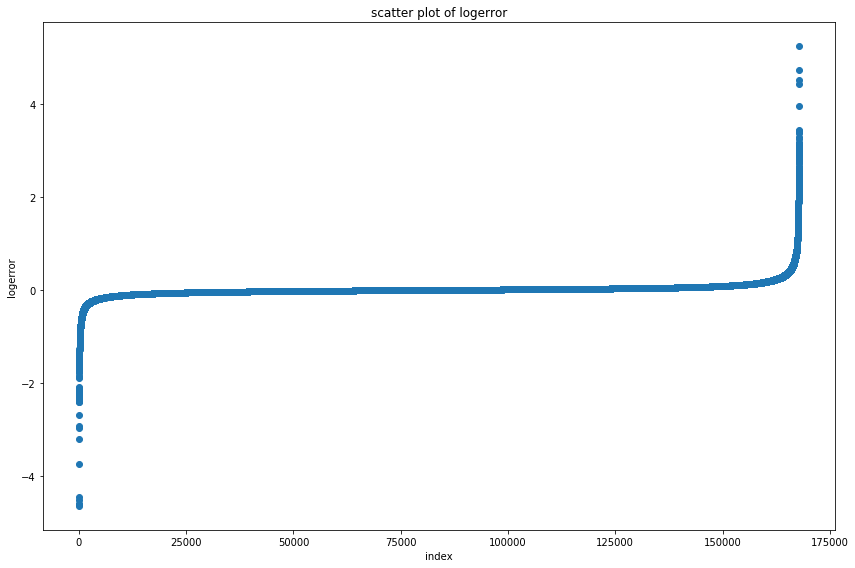

In [14]:
plt.figure(figsize=(12,8))
plt.scatter(range(len(train_df.logerror)),np.sort(train_df.logerror))
plt.title('scatter plot of logerror')
plt.xlabel('index')
plt.ylabel('logerror')
plt.tight_layout()
plt.show()

/home/hskimim/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


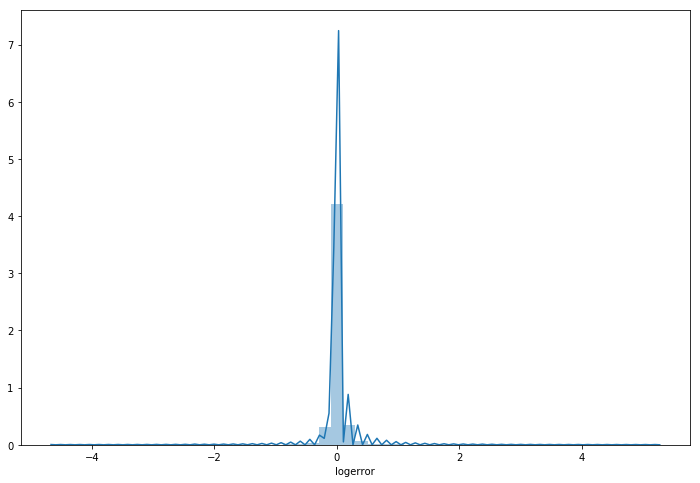

In [26]:
plt.figure(figsize=(12,8))
sns.distplot(train_df.logerror)
plt.show()

In [43]:
print('kurtosis of logerror distribution: {}'.format(sp.stats.kurtosis(train_df.logerror)))
print('skewness of logerror distribution: {}'.format(sp.stats.skew(train_df.logerror)))      

kurtosis of logerror distribution: 121.3859201014111
skewness of logerror distribution: 2.950844290899231


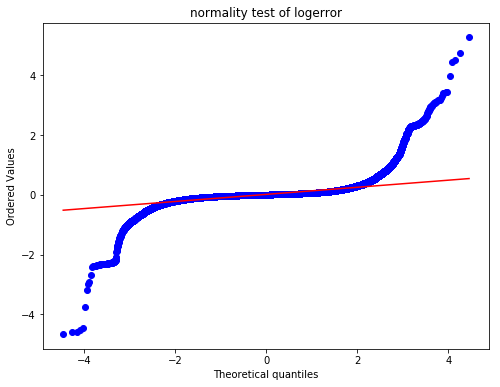

In [17]:
plt.figure(figsize=(8,6))
sp.stats.probplot(train_df.logerror,plot=plt)
plt.title('normality test of logerror')
plt.show()

/home/hskimim/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


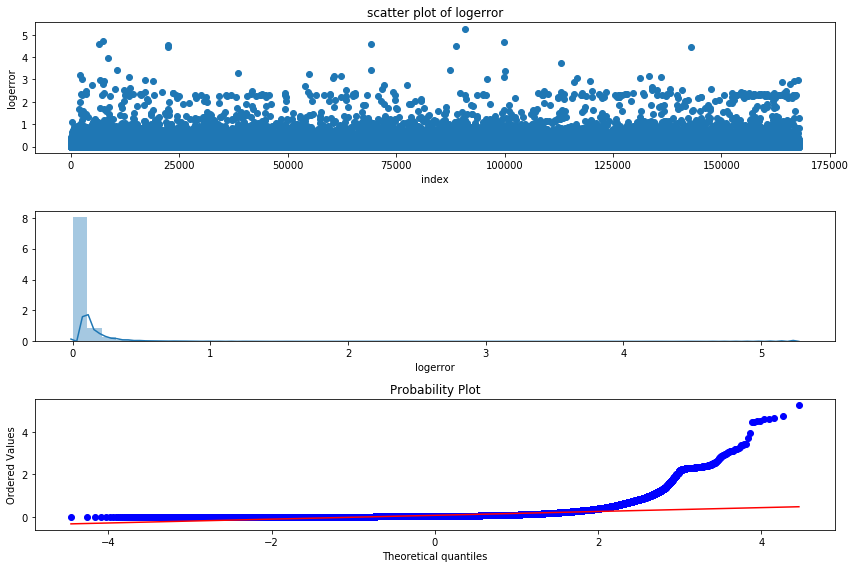

In [19]:
plt.figure(figsize=(12,8))
plt.subplot(311)
plt.scatter(range(len(train_df.logerror)),np.abs(train_df.logerror))
plt.title('scatter plot of logerror')
plt.xlabel('index')
plt.ylabel('logerror')
plt.subplot(312)
sns.distplot(np.abs(train_df.logerror))
plt.subplot(313)
sp.stats.probplot(np.abs(train_df.logerror),plot=plt)
plt.tight_layout()
plt.show()

In [57]:
statsmodels.stats.stattools.jarque_bera(train_df.logerror)

(103316676.95508625, 0.0, 2.950844290899231, 124.3859201014111)

In [20]:
statsmodels.stats.stattools.jarque_bera(np.abs(train_df.logerror))

(178219741.95895752, 0.0, 9.989112585611528, 161.35977484149103)

- JB (float or array) – The Jarque-Bera test statistic
- JBpv (float or array) – The pvalue of the test statistic
- skew (float or array) – Estimated skewness of the data
- kurtosis (float or array) – Estimated kurtosis of the data
    - 즉, logerror distribution 은 정규성을 띄지 않습니다.

### Transactiondate

In [67]:
train_df_month = train_df.copy()
train_df_month.transactiondate = train_df_month.transactiondate.dt.month
train_df_month = train_df_month.iloc[:,1:3]
train_df_month.head()
# train_df_month dataframe을 logerror와 transactiondate의 month 속성만 가지게 한다.

,logerror,transactiondate
0,0.0276,1
1,-0.1684,1
2,-0.0040,1
3,0.0218,1
4,-0.0050,1


In [69]:
train_df_month = train_df_month.groupby(by='transactiondate').agg('mean')\
.reset_index()
train_df_month
# transaction date를 월 별로 정렬하고 그에 따른 logerror의 평균값을 구해 groupby

,transactiondate,logerror
0,1,0.019012
1,2,0.018463
2,3,0.012199
3,4,0.008849
4,5,0.009161
5,6,0.010421
6,7,0.013941
7,8,0.016903
8,9,0.019829
9,10,0.016342


## Changes in transaction over time

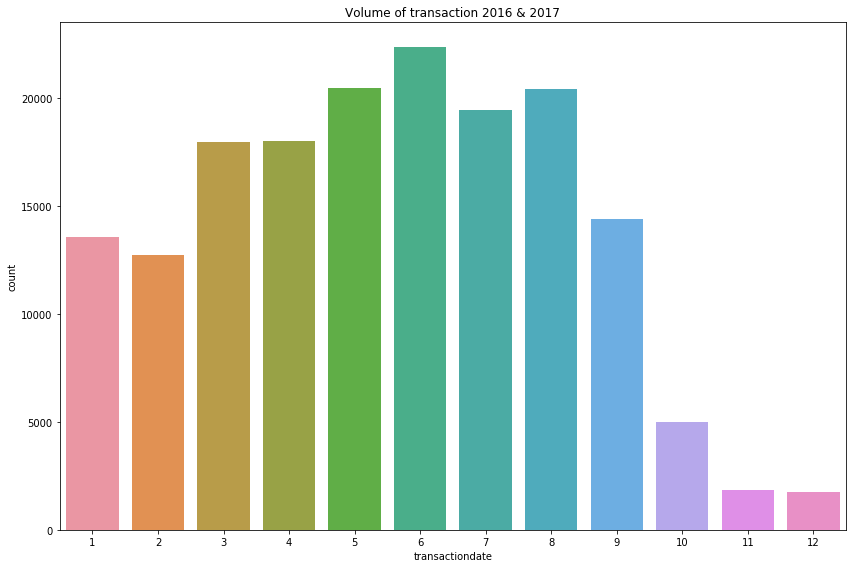

In [73]:
plt.figure(figsize=(12,8))
sns.countplot(train_df.transactiondate.dt.month,data=train_df)
plt.title('Volume of transaction 2016 & 2017')
plt.tight_layout()
plt.show()

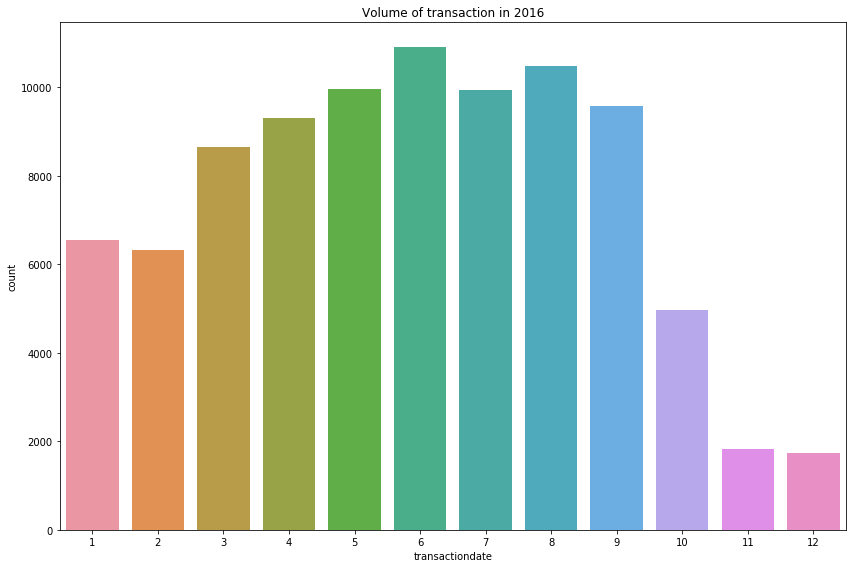

total volumne of transaction in 2016: 90275


In [81]:
plt.figure(figsize=(12,8))
sns.countplot(train_16.transactiondate.dt.month,data=train_df)
plt.title('Volume of transaction in 2016')
plt.tight_layout()
plt.show()
print('total volumne of transaction in 2016: {}'.format(len(train_16.transactiondate)))

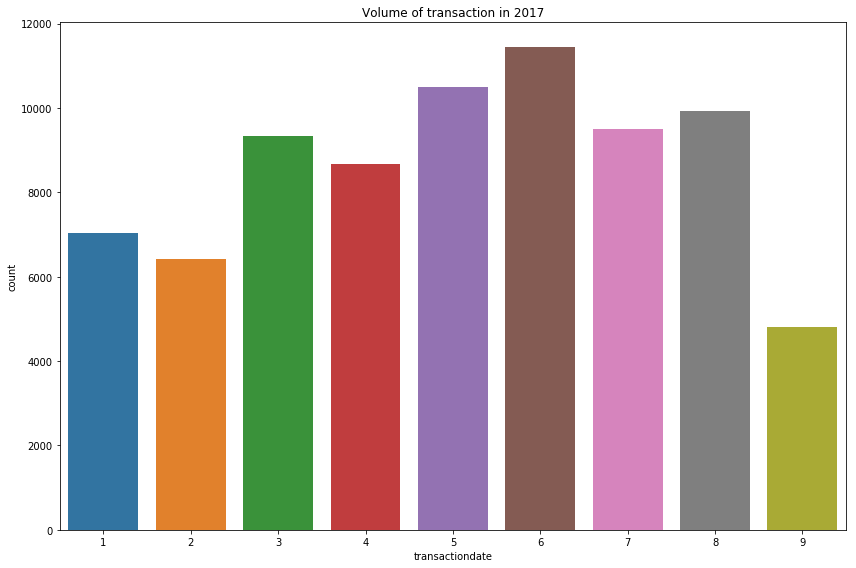

total volumne of transaction in 2017: 77613


In [82]:
plt.figure(figsize=(12,8))
sns.countplot(train_17.transactiondate.dt.month,data=train_df)
plt.title('Volume of transaction in 2017')
plt.tight_layout()
plt.show()
print('total volumne of transaction in 2017: {}'.format(len(train_17.transactiondate)))

In [83]:
train_17.transactiondate.dt.month.value_counts()

6    11456
5    10487
8     9936
7     9490
3     9327
4     8679
1     7025
2     6412
9     4801
Name: transactiondate, dtype: int64

2017년도의 10,11,12 월 거래 기록이 없습니다. 
kaggle zillow prize 문제 시작이 2017년 5월 말인 것을 고려하면,누락된 것으로 보입니다.

## Changes in transaction over time

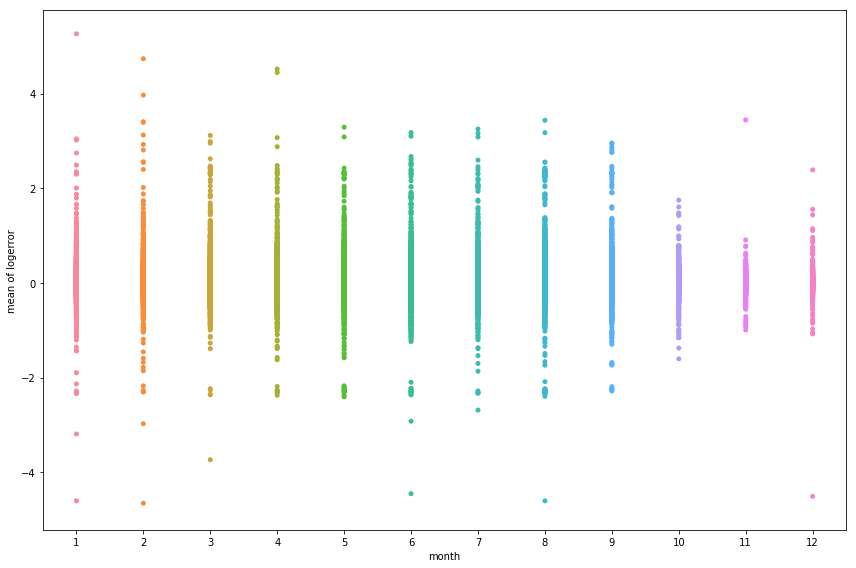

In [95]:
plt.figure(figsize=(12,8))
sns.stripplot(train_df.transactiondate.dt.month,train_df.logerror,data=train_df)
plt.xlabel('month')
plt.ylabel('mean of logerror')
plt.tight_layout()
plt.show()

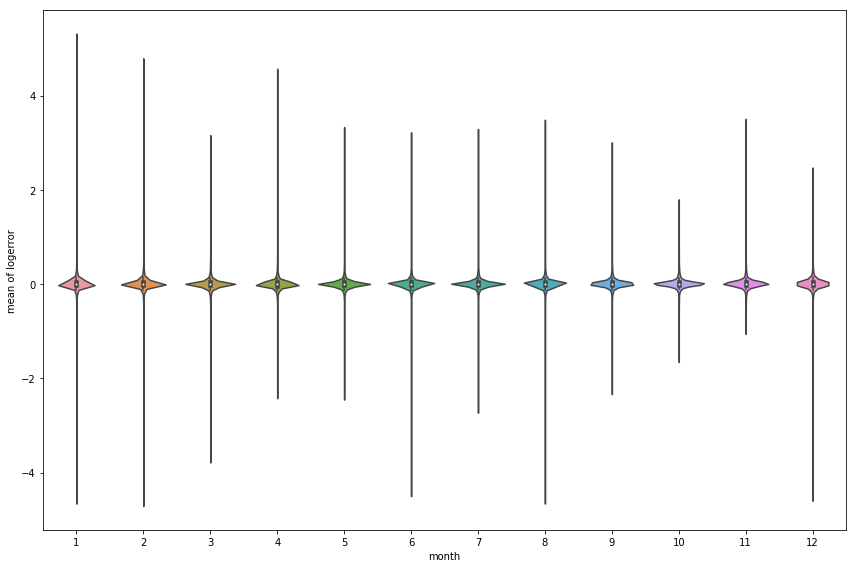

In [93]:
plt.figure(figsize=(12,8))
sns.violinplot(train_df.transactiondate.dt.month,train_df.logerror,data=train_df)
plt.xlabel('month')
plt.ylabel('mean of logerror')
plt.tight_layout()
plt.show()

- month 에 대한 logerror 값의 평균에 대한 그래프(visualization)을 위의 두 그래프(stripplot , violinplot)을 통해서 실시하였다.
- 각 달마다 평균에 강한 density를 보이며 꼬리는 굉장히 긴 분포를 형성한다.

## parcelid
- house 의 ID를 나타내는 parcelid가 몇 회 나오는지, 즉, 몇 번 transaction되는지 알 수 있는 지표를 countplot을 통해 시각화해보겠습니다.

In [108]:
train_df_id = (train_df.parcelid.value_counts().reset_index()).groupby(by='parcelid').agg('size').reset_index()
train_df_id.columns = ['Overlapped_Times','Count']
train_df_id

,Overlapped_Times,Count
0,1,162541
1,2,2660
2,3,9


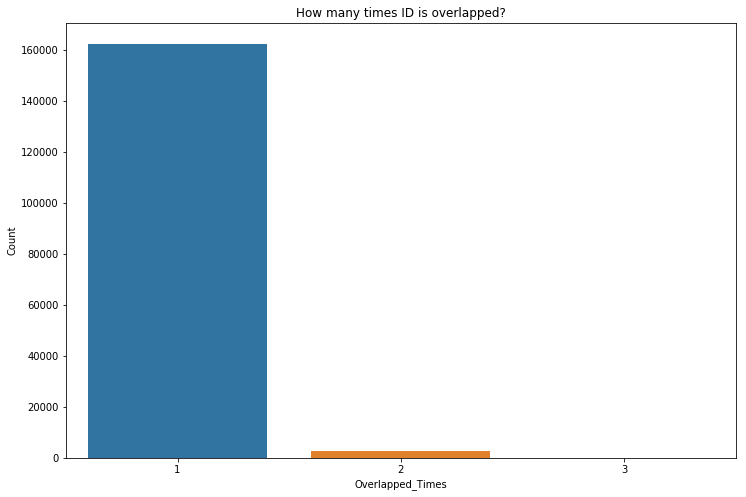

In [109]:
plt.figure(figsize=(12,8))
sns.barplot(train_df_id.Overlapped_Times,train_df_id.Count)
plt.title('How many times ID is overlapped?')
plt.xlabel(train_df_id.columns[0])
plt.ylabel(train_df_id.columns[1])
plt.show()

중복되는 parcelid의 데이터가 있지만 위의 bar plot에서 볼 수 있다시피, 상대적으로 보면, 각각의 ID는 한 번씩 나온다고 할 수 있습니다.

## analysis Dtype

In [138]:
train_df_dtype = train_df.dtypes.value_counts().reset_index()\
.rename(columns={"index":"variableType",0:"count"})
train_df_dtype

,variableType,count
0,float64,53
1,object,5
2,datetime64[ns],1
3,int64,1


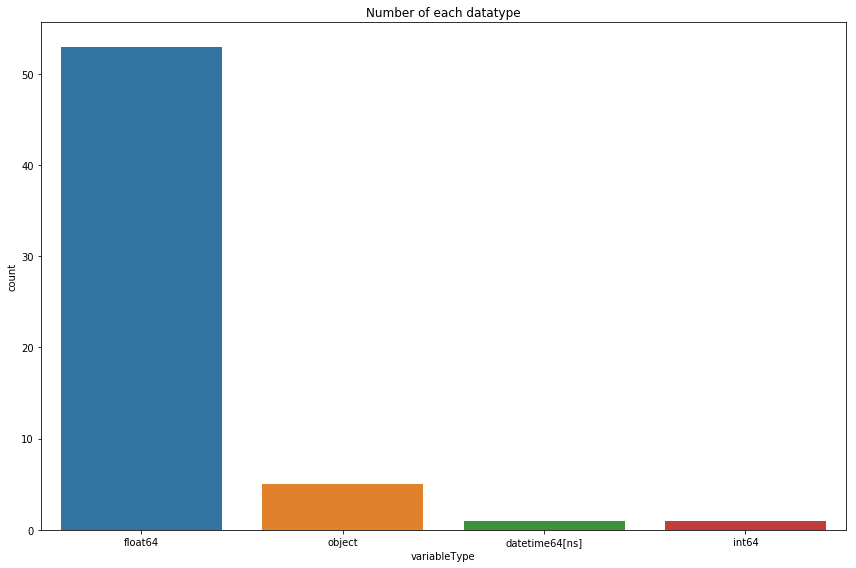

In [140]:
plt.figure(figsize=(12,8))
sns.barplot(train_df_dtype['variableType'],train_df_dtype['count'])
plt.title('Number of each datatype')
plt.tight_layout()
plt.show()

- float64 : numerical data(continuous) categorical data(category = int)
- object : categorical data(category = object)
- datetime : transactiondate column(is parsed)
- int64 = parcelid column(default dtype of parcelid)